In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler as sds


In [2]:
for dirname, _, filenames in os.walk('/home/daftvm/workspace/mast1_ai/ydays/real_estate/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')


/home/daftvm/workspace/mast1_ai/ydays/real_estate/real_estate.csv
/home/daftvm/workspace/mast1_ai/ydays/real_estate/real_estate.ipynb


In [3]:
df = pd.read_csv('real_estate.csv')
display(df)
df.describe()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df_x = df.drop(['No', 'Y house price of unit area'], axis=1)
df_y = df['Y house price of unit area']


In [5]:
df_columns = df_x.drop(['X5 latitude', 'X6 longitude'], axis=1)
df_columns.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012.917,32.0,84.87882,10
1,2012.917,19.5,306.59470,9
2,2013.583,13.3,561.98450,5
3,2013.500,13.3,561.98450,5
4,2012.833,5.0,390.56840,5


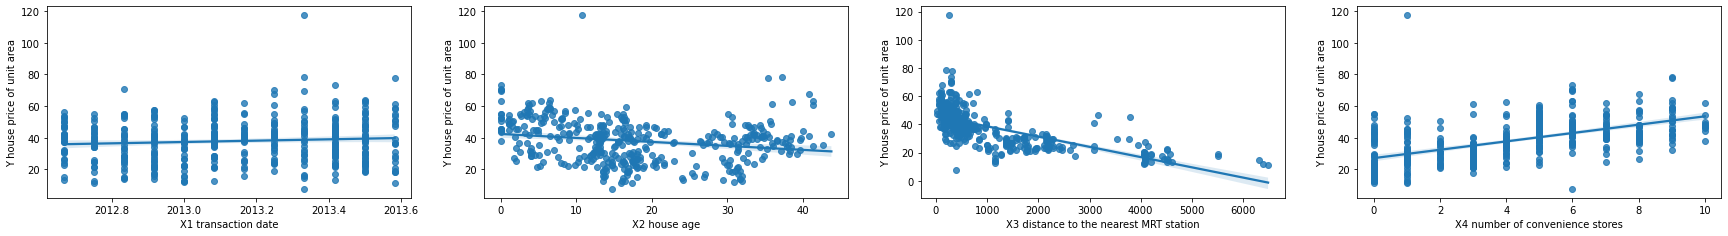

In [6]:
plt.figure(figsize=(30, 50))
for i in enumerate(df_columns):
    plt.subplot(12, 4, i[0]+1)
    sns.regplot(x=df_columns[i[1]], y=df_y, data=df)
    plt.xlabel(i[1])


In [7]:
def analysis(data):
    return pd.DataFrame({"Data Type": data.dtypes, "Unique Count": data.apply(lambda x: x.nunique(), axis=0),
                         "Null Count": data.isnull().sum()})


In [8]:
analysis(df_x)


,Data Type,Unique Count,Null Count
X1 transaction date,float64,12,0
X2 house age,float64,236,0
X3 distance to the nearest MRT station,float64,259,0
X4 number of convenience stores,int64,11,0
X5 latitude,float64,234,0
X6 longitude,float64,232,0


In [9]:
X_train, X_test, y_train, y_test = tts(
    df_x, df_y, test_size=0.1, random_state=101)


In [10]:
def preprocessing(degree):
    PolynomialConverter = PolynomialFeatures(degree=degree, include_bias=False)
    return PolynomialConverter


In [11]:
poly_convert = preprocessing(2)
df_prepro = poly_convert.fit(df_x)
df_prepro = poly_convert.transform(df_x)


In [12]:
df_x = df.drop(['No', 'Y house price of unit area'], axis=1)
df_y = df['Y house price of unit area']


In [13]:
X_train, X_test, y_train, y_test = tts(
    df_prepro, df_y, test_size=0.1, random_state=101)


In [14]:
sds.fit(X_train)

X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

TypeError: fit() missing 1 required positional argument: 'X'